In [225]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from DataManager import DataManager

In [2]:
dm = DataManager()

In [3]:
dm.data

,drug,cell_line,replicate,n,nseg.0.m.cx.mean,nseg.0.m.cy.mean,nseg.0.m.majoraxis.mean,nseg.0.m.eccentricity.mean,nseg.0.m.theta.mean,nseg.0.s.area.mean,...,lcd.10NN.qt.0.95,lcd.10NN.qt.0.99,lcd.15NN.qt.0.01,lcd.15NN.qt.0.05,lcd.15NN.qt.0.95,lcd.15NN.qt.0.99,lcd.20NN.qt.0.01,lcd.20NN.qt.0.05,lcd.20NN.qt.0.95,lcd.20NN.qt.0.99
0,0,0,0,11.908014,10.062505,9.889313,4.720813,-0.458763,-5.396460,8.469626,...,-9.296161,-8.963428,-13.776685,-12.709686,-9.409954,-9.118151,-13.788679,-12.884619,-9.500639,-9.174099
1,0,0,1,12.368314,10.059354,10.046932,4.740584,-0.462816,-6.284735,8.510628,...,-9.290559,-8.938931,-13.088882,-12.093267,-9.439528,-9.095541,-13.010437,-12.210505,-9.502620,-9.127998
2,0,1,0,12.983570,10.000412,9.948694,4.717664,-0.407438,-6.460001,8.421265,...,-9.097825,-8.761517,-12.210008,-11.416919,-9.207236,-8.871515,-12.261069,-11.448155,-9.265325,-8.956098
3,0,1,1,12.948506,9.976027,10.005307,4.713709,-0.384049,-6.000883,8.387658,...,-9.015589,-8.646580,-12.379602,-11.365260,-9.128068,-8.779089,-12.634356,-11.489054,-9.162259,-8.739030
4,0,2,0,12.664426,9.999071,9.954613,4.714847,-0.403862,-6.195148,8.403592,...,-9.048967,-8.738565,-12.749073,-11.821687,-9.159890,-8.847677,-12.748170,-11.955179,-9.218552,-8.897580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32923,1371,9,1,13.121068,10.082178,9.964604,4.675257,-0.438223,-5.612611,8.366690,...,-8.940182,-8.616326,-12.015938,-11.214291,-9.045072,-8.663756,-12.053631,-11.241526,-9.091129,-8.685483
32924,1371,10,0,12.308481,10.077399,10.021471,4.739401,-0.399021,-6.648080,8.463474,...,-9.262980,-8.909332,-13.425723,-12.129619,-9.389004,-9.073847,-13.378090,-12.339601,-9.462127,-9.146595
32925,1371,10,1,12.196224,9.983833,10.066827,4.707107,-0.391595,-6.145939,8.393671,...,-9.125568,-8.617597,-13.139033,-12.179537,-9.274037,-8.814934,-13.266885,-12.272701,-9.348399,-8.797426
32926,1371,11,0,13.167953,10.058170,10.131641,4.683559,-0.401863,-6.164943,8.350968,...,-8.797535,-8.417296,-12.429462,-11.221106,-8.899290,-8.466269,-12.450038,-11.285509,-8.946207,-8.486387


In [4]:
dm.cell_line_df

,name,mutationDetailed,mutation,startPlate
0,02-006,AKT1-/-&AKT2-/-,AKT1/2,1.0
1,02-031,MEK2-/-,MEK2,5.0
2,02-004,AKT1-/-,AKT1,9.0
3,104-009,CTNNB1 mt-/wt+,CTNNB1 wt,13.0
4,PAR007,PARENTAL007,HCT116 P2,17.0
5,104-001,P53-/-,P53,21.0
6,104-004,PTEN-/-,PTEN,25.0
7,104-007,PI3KCA mt-/wt+,PI3KCA wt,29.0
8,104-008,KRAS mt-/wt+,KRAS wt,33.0
9,02-008,BAX-/-,BAX,37.0


# KEGG Data

In [5]:
from Bio import SeqIO
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from Bio.Graphics.ColorSpiral import ColorSpiral

from IPython.display import Image, HTML, IFrame

In [6]:
human_pathways = kegg_list("pathway", "hsa").read()

#human_pathways.decode("utf-8").split("\n")[0:5]
human_pathways = human_pathways.split("\n")
human_pathways = [r.replace("path:", "").replace(" - Homo sapiens (human)", "") for r in human_pathways if r]
human_pathways = {r.split("\t")[0]: r.split("\t")[1] for r in human_pathways}
print(len(human_pathways))

337


In [7]:
human_pathways

{'hsa00010': 'Glycolysis / Gluconeogenesis',
 'hsa00020': 'Citrate cycle (TCA cycle)',
 'hsa00030': 'Pentose phosphate pathway',
 'hsa00040': 'Pentose and glucuronate interconversions',
 'hsa00051': 'Fructose and mannose metabolism',
 'hsa00052': 'Galactose metabolism',
 'hsa00053': 'Ascorbate and aldarate metabolism',
 'hsa00061': 'Fatty acid biosynthesis',
 'hsa00062': 'Fatty acid elongation',
 'hsa00071': 'Fatty acid degradation',
 'hsa00072': 'Synthesis and degradation of ketone bodies',
 'hsa00100': 'Steroid biosynthesis',
 'hsa00120': 'Primary bile acid biosynthesis',
 'hsa00130': 'Ubiquinone and other terpenoid-quinone biosynthesis',
 'hsa00140': 'Steroid hormone biosynthesis',
 'hsa00190': 'Oxidative phosphorylation',
 'hsa00220': 'Arginine biosynthesis',
 'hsa00230': 'Purine metabolism',
 'hsa00232': 'Caffeine metabolism',
 'hsa00240': 'Pyrimidine metabolism',
 'hsa00250': 'Alanine, aspartate and glutamate metabolism',
 'hsa00260': 'Glycine, serine and threonine metabolism',
 

In [8]:
database = "genes"
organism = "hsa"
organism_tcode = "T01001"
query = "MEK2"



In [9]:
def find_KEGG_entries(gene, filtering=True):
    resp = kegg_find("T01001", gene).read()
    resp_list = resp.split("\n")
    resp_list = [r for r in resp_list if r]
    query_results = []
    for r in resp_list:
        entry_id, results = r.split("\t")
        genes, description = results.split("; ")
        genes = genes.split(", ")
        if gene in genes or not filtering:
            query_results.append({"entry_id": entry_id, "gene_names": genes, "description": description})
        
    return query_results
    

In [10]:
def parse_pathways(entry_id):
    entry_content = kegg_get(entry_id).read()
    pathways_str = entry_content.split("PATHWAY")[1].split("NETWORK")[0]
    pathways = pathways_str.split("\n")
    pathways = [p.strip() for p in pathways if p]
    parsed_pathways = {}
    for p in pathways:
        path_id, description = p.split(" ", 1)
        parsed_pathways[path_id.strip()] = description.strip()
    return parsed_pathways

In [11]:
parse_pathways("hsa:207")

{'hsa01521': 'EGFR tyrosine kinase inhibitor resistance',
 'hsa01522': 'Endocrine resistance',
 'hsa01524': 'Platinum drug resistance',
 'hsa04010': 'MAPK signaling pathway',
 'hsa04012': 'ErbB signaling pathway',
 'hsa04014': 'Ras signaling pathway',
 'hsa04015': 'Rap1 signaling pathway',
 'hsa04022': 'cGMP-PKG signaling pathway',
 'hsa04024': 'cAMP signaling pathway',
 'hsa04062': 'Chemokine signaling pathway',
 'hsa04066': 'HIF-1 signaling pathway',
 'hsa04068': 'FoxO signaling pathway',
 'hsa04071': 'Sphingolipid signaling pathway',
 'hsa04072': 'Phospholipase D signaling pathway',
 'hsa04140': 'Autophagy - animal',
 'hsa04150': 'mTOR signaling pathway',
 'hsa04151': 'PI3K-Akt signaling pathway',
 'hsa04152': 'AMPK signaling pathway',
 'hsa04210': 'Apoptosis',
 'hsa04211': 'Longevity regulating pathway',
 'hsa04213': 'Longevity regulating pathway - multiple species',
 'hsa04218': 'Cellular senescence',
 'hsa04261': 'Adrenergic signaling in cardiomyocytes',
 'hsa04370': 'VEGF signal

## Gene Pathways

### AKT 1

In [12]:
find_KEGG_entries("AKT1")

[{'entry_id': 'hsa:207',
  'gene_names': ['AKT1',
   'AKT',
   'CWS6',
   'PKB',
   'PKB-ALPHA',
   'PRKBA',
   'RAC',
   'RAC-ALPHA'],
  'description': 'AKT serine/threonine kinase 1'}]

In [13]:
akt1_parsed = parse_pathways("hsa:207")
akt1_pathways = list(akt1_parsed.keys())
len(akt1_pathways)

94

### ATK1 & 2

In [14]:
find_KEGG_entries("AKT2")

[{'entry_id': 'hsa:208',
  'gene_names': ['AKT2', 'HIHGHH', 'PKBB', 'PKBBETA', 'PRKBB', 'RAC-BETA'],
  'description': 'AKT serine/threonine kinase 2'}]

In [15]:
akt2_parsed = parse_pathways("hsa:208")
akt2_pathways = list(akt2_parsed.keys())

akt1_and_2_pathways = list(set(akt1_pathways + akt2_pathways))
len(akt1_and_2_pathways)

94

### MEK2

In [16]:
find_KEGG_entries("MEK2")

[{'entry_id': 'hsa:5605',
  'gene_names': ['MAP2K2', 'CFC4', 'MAPKK2', 'MEK2', 'MKK2', 'PRKMK2'],
  'description': 'mitogen-activated protein kinase kinase 2'}]

In [17]:
mek2_parsed = parse_pathways("hsa:5605")
mek2_pathways = list(mek2_parsed.keys())
mek2_pathways

['hsa01521',
 'hsa01522',
 'hsa04010',
 'hsa04012',
 'hsa04014',
 'hsa04015',
 'hsa04022',
 'hsa04024',
 'hsa04066',
 'hsa04068',
 'hsa04071',
 'hsa04072',
 'hsa04140',
 'hsa04150',
 'hsa04151',
 'hsa04210',
 'hsa04218',
 'hsa04270',
 'hsa04370',
 'hsa04371',
 'hsa04540',
 'hsa04550',
 'hsa04620',
 'hsa04650',
 'hsa04660',
 'hsa04662',
 'hsa04664',
 'hsa04720',
 'hsa04722',
 'hsa04730',
 'hsa04810',
 'hsa04910',
 'hsa04912',
 'hsa04915',
 'hsa04916',
 'hsa04917',
 'hsa04919',
 'hsa04921',
 'hsa04926',
 'hsa04929',
 'hsa04934',
 'hsa04935',
 'hsa05010',
 'hsa05020',
 'hsa05132',
 'hsa05135',
 'hsa05160',
 'hsa05161',
 'hsa05163',
 'hsa05164',
 'hsa05165',
 'hsa05166',
 'hsa05167',
 'hsa05170',
 'hsa05200',
 'hsa05205',
 'hsa05206',
 'hsa05210',
 'hsa05211',
 'hsa05213',
 'hsa05214',
 'hsa05215',
 'hsa05216',
 'hsa05218',
 'hsa05219',
 'hsa05220',
 'hsa05221',
 'hsa05223',
 'hsa05224',
 'hsa05225',
 'hsa05226',
 'hsa05230',
 'hsa05231',
 'hsa05235']

### P53

In [18]:
find_KEGG_entries("P53")

[{'entry_id': 'hsa:7157',
  'gene_names': ['TP53', 'BCC7', 'BMFS5', 'LFS1', 'P53', 'TRP53'],
  'description': 'tumor protein p53'}]

In [19]:
p53_parsed = parse_pathways("hsa:7157")
p53_pathways = list(p53_parsed.keys())
len(p53_pathways)

50

### PTEN

In [20]:
find_KEGG_entries("PTEN")

[{'entry_id': 'hsa:5728',
  'gene_names': ['PTEN',
   '10q23del',
   'BZS',
   'CWS1',
   'DEC',
   'GLM2',
   'MHAM',
   'MMAC1',
   'PTEN1',
   'PTENbeta',
   'TEP1'],
  'description': 'phosphatase and tensin homolog'}]

In [21]:
pten_parsed = parse_pathways("hsa:5728")
pten_pathways = list(pten_parsed.keys())
len(pten_pathways)

26

### BAX

In [22]:
find_KEGG_entries("BAX")

[{'entry_id': 'hsa:581',
  'gene_names': ['BAX', 'BCL2L4'],
  'description': 'BCL2 associated X, apoptosis regulator'}]

In [23]:
bax_parsed = parse_pathways("hsa:581")
bax_pathways = list(bax_parsed.keys())
len(bax_pathways)

48

### MEK1

In [24]:
find_KEGG_entries("MEK1")

[{'entry_id': 'hsa:5604',
  'gene_names': ['MAP2K1', 'CFC3', 'MAPKK1', 'MEK1', 'MEL', 'MKK1', 'PRKMK1'],
  'description': 'mitogen-activated protein kinase kinase 1'}]

In [25]:
mek1_parsed = parse_pathways("hsa:581")
mek1_pathways = list(mek1_parsed.keys())
len(mek1_pathways)

48

### PI3KCA

In [26]:
find_KEGG_entries("PI3K", filtering=False)

[{'entry_id': 'hsa:23049',
  'gene_names': ['SMG1', '61E3.4', 'ATX', 'LIP'],
  'description': 'SMG1 nonsense mediated mRNA decay associated PI3K related kinase'},
 {'entry_id': 'hsa:5291',
  'gene_names': ['PIK3CB', 'P110BETA', 'PI3K', 'PI3KBETA', 'PIK3C1'],
  'description': 'phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit beta'},
 {'entry_id': 'hsa:5286',
  'gene_names': ['PIK3C2A',
   'CPK',
   'OCSKD',
   'PI3-K-C2(ALPHA)',
   'PI3-K-C2A',
   'PI3K-C2-alpha',
   'PI3K-C2alpha'],
  'description': 'phosphatidylinositol-4-phosphate 3-kinase catalytic subunit type 2 alpha'},
 {'entry_id': 'hsa:5287',
  'gene_names': ['PIK3C2B', 'C2-PI3K'],
  'description': 'phosphatidylinositol-4-phosphate 3-kinase catalytic subunit type 2 beta'},
 {'entry_id': 'hsa:23533',
  'gene_names': ['PIK3R5', 'F730038I15Rik', 'FOAP-2', 'P101-PI3K', 'p101'],
  'description': 'phosphoinositide-3-kinase regulatory subunit 5'},
 {'entry_id': 'hsa:5288',
  'gene_names': ['PIK3C2G', 'PI3K-C2-gamma', '

In [27]:
pik3kca_parsed = parse_pathways("hsa:5290")
pik3kca_pathways = list(pik3kca_parsed.keys())
len(pik3kca_pathways)

99

### KRAS

In [28]:
find_KEGG_entries("KRAS")

[{'entry_id': 'hsa:3845',
  'gene_names': ['KRAS',
   "'C-K-RAS",
   'C-K-RAS',
   'CFC2',
   'K-RAS2A',
   'K-RAS2B',
   'K-RAS4A',
   'K-RAS4B',
   'K-Ras',
   'K-Ras_2',
   'KI-RAS',
   'KRAS1',
   'KRAS2',
   'NS',
   'NS3',
   'OES',
   'RALD',
   'RASK2',
   'c-Ki-ras',
   'c-Ki-ras2'],
  'description': 'KRAS proto-oncogene, GTPase'}]

In [29]:
kras_parsed = parse_pathways("hsa:3845")
kras_pathways = list(kras_parsed.keys())
len(kras_pathways)

79

### CTNNB1

In [30]:
find_KEGG_entries("CTNNB1")

[{'entry_id': 'hsa:1499',
  'gene_names': ['CTNNB1', 'CTNNB', 'EVR7', 'MRD19', 'NEDSDV', 'armadillo'],
  'description': 'catenin beta 1'}]

In [31]:
ctnnb1_parsed = parse_pathways("hsa:1499")
ctnnb1_pathways = list(ctnnb1_parsed.keys())
len(ctnnb1_pathways)

29

# Pathways Priors

In [32]:
mutations_order = ["HCT116 P1", "HCT116 P2", "PI3KCA wt",
                   "AKT1", "AKT1/2", "PTEN", "KRAS wt",
                   "MEK1", "MEK2", "CTNNB1 wt", "P53", "BAX"]
mutations_order = list(dm.cell_line_df["mutation"])
hsa_pathways = sorted(list(human_pathways.keys()))
pathway_lists = {
    "HCT116 P1": [],
    "HCT116 P2": [],
    "PI3KCA wt": pik3kca_pathways,
    "AKT1": akt1_pathways,
    "AKT1/2": akt1_and_2_pathways,
    "PTEN": pten_pathways,
    "KRAS wt": kras_pathways,
    "MEK1": mek1_pathways,
    "MEK2": mek2_pathways,
    "CTNNB1 wt": ctnnb1_pathways,
    "P53": p53_pathways,
    "BAX": bax_pathways
}

In [33]:
mutations_order

['AKT1/2',
 'MEK2',
 'AKT1',
 'CTNNB1 wt',
 'HCT116 P2',
 'P53',
 'PTEN',
 'PI3KCA wt',
 'KRAS wt',
 'BAX',
 'MEK1',
 'HCT116 P1']

In [34]:
pathways_set = set()
for k, pw in pathway_lists.items():
    pathways_set.update(pw)
len(pathways_set)
pathways_set = sorted(list(pathways_set))

In [35]:
cl_idxs = {}
for i, mut in dm.cell_line_df["mutation"].iteritems():
    cl_idxs[mut] = i

In [69]:
cl_pathways_mask = np.zeros((len(pathways_set), len(mutations_order)))

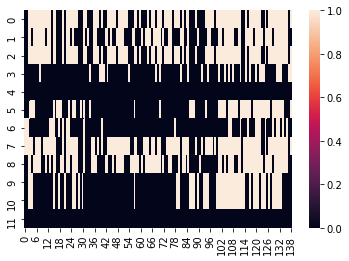

In [70]:
for i, mut in enumerate(mutations_order):
    impacted_pathways_idxs = [j for j, p in enumerate(pathways_set) if p in pathway_lists[mut]]
    cl_pathways_mask[impacted_pathways_idxs, i] = 1
cl_pathways_mask = cl_pathways_mask.T
sns.heatmap(cl_pathways_mask)

In [39]:
dmso_indexes = []
for row in dm.drug_df.itertuples():
    #"dimethyl" in row.Name or "DMSO" in row.SecName or 
    if "ctr" in row.GeneID and "DMSO" in row.Content:
        dmso_indexes.append(row.Index)
dmso_indexes

[62,
 129,
 173,
 239,
 283,
 406,
 473,
 517,
 583,
 627,
 749,
 816,
 860,
 925,
 968,
 1091,
 1158,
 1202,
 1268,
 1312]

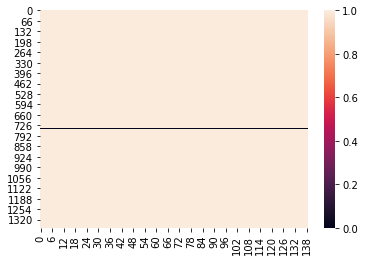

In [67]:
drug_pathways_mask = np.ones((len(pathways_set), len(dm.drug_df)))
drug_pathways_mask[:, dmso_indexes] = 0
drug_pathways_mask = drug_pathways_mask.T
sns.heatmap(drug_pathways_mask)

# Features Processing

In [41]:
control_samples = dm.get_control_samples()
control_samples

Int64Index([ 1496,  1497,  1510,  1511,  3104,  3105,  3118,  3119,  4160,
             4161,  4174,  4175,  5744,  5745,  5758,  5759,  6800,  6801,
             6814,  6815,  9752,  9753,  9766,  9767, 11360, 11361, 11374,
            11375, 12416, 12417, 12430, 12431, 14000, 14001, 14014, 14015,
            15056, 15057, 15070, 15071, 17984, 17985, 17998, 17999, 19592,
            19593, 19606, 19607, 20648, 20649, 20662, 20663, 22208, 22209,
            22222, 22223, 23240, 23241, 23254, 23255, 26192, 26193, 26206,
            26207, 27800, 27801, 27814, 27815, 28856, 28857, 28870, 28871,
            30440, 30441, 30454, 30455, 31496, 31497, 31510, 31511],
           dtype='int64')

In [42]:
avg_ctrl_features = dm.data.iloc[control_samples].drop(["drug", "cell_line", "replicate"], axis=1).mean()
avg_ctrl_features 

n                             13.436611
nseg.0.m.cx.mean              10.019292
nseg.0.m.cy.mean               9.997792
nseg.0.m.majoraxis.mean        4.666768
nseg.0.m.eccentricity.mean    -0.405694
                                ...    
lcd.15NN.qt.0.99              -8.514029
lcd.20NN.qt.0.01             -11.736713
lcd.20NN.qt.0.05             -10.901078
lcd.20NN.qt.0.95              -8.937072
lcd.20NN.qt.0.99              -8.524346
Length: 385, dtype: float64

# Model

In [43]:
np.random.seed(42)
ptw_ftr_matrix = np.random.randn(len(avg_ctrl_features), cl_pathways_mask.shape[0])/4
cl_ptw_matrix = np.multiply(np.random.rand(*cl_pathways_mask.shape), cl_pathways_mask)
drug_ptw_matrix = np.multiply(np.random.rand(*drug_pathways_mask.shape), drug_pathways_mask)

def predict_features(cl_id, drug_idx):
    cl_ftrs = np.dot(ptw_ftr_matrix, cl_ptw_matrix[:, cl_id])
    drug_ftrs = np.dot(ptw_ftr_matrix, drug_ptw_matrix[:, drug_idx])
    return cl_ftrs.flatten() + drug_ftrs.flatten()


In [44]:
def mse_reconstruction(ftrs, c, d, F):
    return (ftrs - np.dot(F, (c+d).reshape(-1,1)))**2

def loss_function(ftrs, c, d, F, alpha=0.1, beta=0.01, gamma=0.1):
    reconstruction_loss = mse_reconstruction(ftrs, c, d)
    l1_loss = alpha*(np.sum(np.abs(c)) + np.sum(np.abs(d)))
    l2_loss = beta*(np.sum(c**2) + np.sum(d**2))
    l2_F_loss = gamma*(np.sum(np.multiply(F, F)))
    return reconstruction_loss+l1_loss+l2_loss+l2_F_loss
    
def grad_c(ftrs, c, d, F):
    mse_grad = 

SyntaxError: invalid syntax (<ipython-input-44-d5722ab1c5c0>, line 11)

# Pytorch Model

In [152]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [269]:
class FeaturesDataset(Dataset):
    def __init__(self, df, control_avg=None):
        super().__init__()
        
        self.control_avg = control_avg
        self.data = df.values[:,3:]
        if control_avg is not None:
            self.data /= control_avg
        self.dcr = df.values[:,:3]
        self.data = torch.tensor(self.data)
        self.dcr = torch.tensor(self.dcr, dtype=torch.int32)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, i):
        return (self.dcr[i,:], self.data[i,:])
    
    def get_control_cl_idxs(self):
        return [i for i, dcr in enumerate(self.dcr) if dcr[1] in [4,11]]
    
    def get_control_drug_idxs(self):
        return [i for i, dcr in enumerate(self.dcr) if dcr[0] in dmso_indexes]
    
    def get_index(self, drug, cell_line, replicate):
        dcr = torch.tensor([drug, cell_line, replicate])
        for i in range(len(self.dcr)):
            if self.dcr[i, :] == dcr:
                return i
        return None

class MF_Model(nn.Module):
    def __init__(self, cl_mask, drug_mask, n_ftrs=385):
        super().__init__()
        
        self.cl_mask = torch.tensor(cl_mask).detach()
        self.drug_mask = torch.tensor(drug_mask).detach()
        
        torch.manual_seed(42)
        self.cl_embedding = nn.Embedding(*cl_mask.shape)
        self.cl_embedding.weight.data *= cl_mask
        self.drug_embedding = nn.Embedding(*drug_mask.shape)
        self.drug_embedding.weight.data *= drug_mask

        
        n_pathways = drug_mask.shape[1]
        self.ftr_ptw = nn.Linear(n_pathways, n_ftrs, bias=False)
        
        self.layers = {"cl_embedding": self.cl_embedding,
                       "drug_embedding": self.drug_embedding,
                        "pathway_effect": self.ftr_ptw}
        
    def freeze_layer(self, layer_name):
        assert layer_name in self.layers.keys()
        for param in self.layers[layer_name].parameters():
            param.requires_grad = False
    
    def freeze_all(self):
        for layer in self.layers.values():
            for param in layer.parameters():
                param.requires_grad = False
            
    def unfreeze_layer(self, layer_name):
        assert layer_name in self.layers.keys()
        for param in self.layers[layer_name].parameters():
            param.requires_grad = True
            
    def unfreeze_all(self):
        for layer in self.layers.values():
            for param in layer.parameters():
                param.requires_grad = True
                
    def forward(self, drg_idx, cl_idx):
        drg_idx = drg_idx.long()
        cl_idx = cl_idx.long()
        drug_embedding = self.drug_embedding(drg_idx)
        drug_embedding *= self.drug_mask[drg_idx, :]
        cl_embedding = self.drug_embedding(cl_idx)
        cl_embedding *= self.cl_mask[cl_idx, :]
        drug_ftrs = self.ftr_ptw(drug_embedding)
        cl_ftrs = self.ftr_ptw(cl_embedding)
        return drug_ftrs + cl_ftrs
    
class CustomLoss(nn.Module):
    def __init__(self, alpha=0.1, beta=0.01, gamma=0.01):
        super().__init__()
        self.reconstr_loss = nn.MSELoss()
        self.l1_loss = nn.L1Loss(reduction="mean")
        self.l2_loss = nn.MSELoss()
        
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        
    def forward(self, pred_ftr, target_ftr, c, d, F):
        reconstr_loss = self.reconstr_loss(pred_ftr, target_ftr)
        l1_loss = self.alpha*(self.l1_loss(c, torch.zeros_like(c))+self.l1_loss(c, torch.zeros_like(d)))
        l2_loss = self.beta*(self.l2_loss(c, torch.zeros_like(c))+self.l2_loss(c, torch.zeros_like(d)))
        l2_loss_F = self.gamma*self.l2_loss(F, torch.zeros_like(F))
        return reconstr_loss+l1_loss+l2_loss+l2_loss_F
                         

In [296]:
mf_model = MF_Model(cl_pathways_mask, drug_pathways_mask).double()
mf_model.unfreeze_all()

In [297]:
ftrs_ds = FeaturesDataset(dm.data, avg_ctrl_features.values)
ftrs_dataloader = DataLoader(ftrs_ds, batch_size=32,
                        shuffle=True, num_workers=4)
mf_model = MF_Model(cl_pathways_mask, drug_pathways_mask).double()
loss_function = CustomLoss(alpha=1.2, beta=0.3, gamma=0.00001)
optimizer = torch.optim.SGD(mf_model.parameters(), lr=0.01)

    


Initializing cl matrix value by using control drug samples only
Iteration 5001, Error: 1.2364314955269813

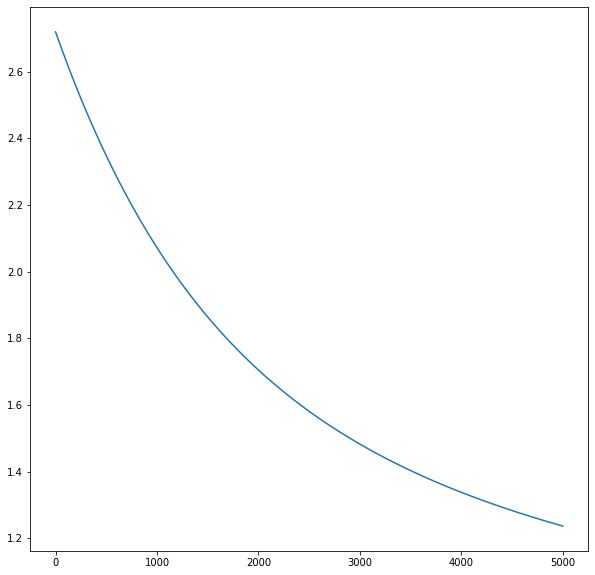

In [298]:
print("Initializing cl matrix value by using control drug samples only")
control_drug_idxs = ftrs_ds.get_control_drug_idxs()
mf_model.freeze_layer("drug_embedding")
dcr, ftrs = ftrs_ds[control_drug_idxs]
errors_list = []
#for n_iter in tqdm(range(100)):
counter = 0
while True:
    counter +=1
    drg = dcr[:,0].long()
    cl = dcr[:,1].long()
    pred_ftrs = mf_model(drg, cl)
    error = loss_function(pred_ftrs, ftrs, 
                  mf_model.cl_embedding(cl), mf_model.drug_embedding(drg), 
                  mf_model.ftr_ptw.weight.data)
    error.backward()
    errors_list.append(error.item())
    print("\rIteration {}, Error: {}".format(counter, errors_list[-1]), end="")
    optimizer.step()
    optimizer.zero_grad()
    if len(errors_list)>2:
        if np.abs(errors_list[-1]-errors_list[-2])<0.00001:
            break
    if counter > 5000: break
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(range(len(errors_list)), errors_list)
plt.show()

Initializing drug matrix value by using control cl only and freezing ftrs
Iteration 5001, Error: 1.1440224277267084

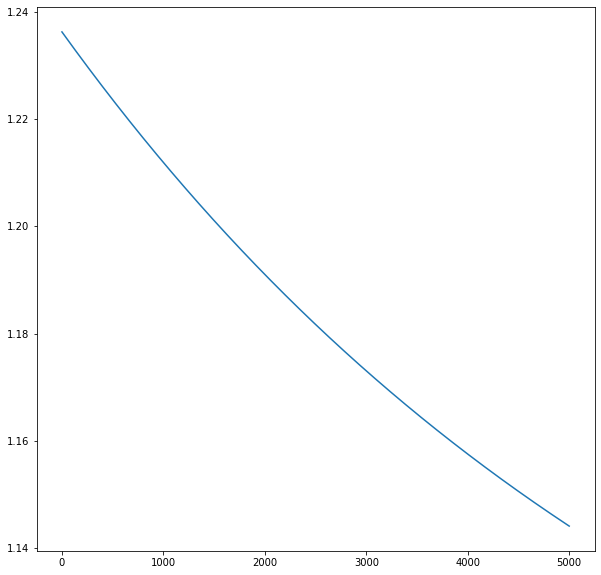

In [299]:
print("Initializing drug matrix value by using control cl only and freezing ftrs")
control_cl_idxs = ftrs_ds.get_control_drug_idxs()
mf_model.freeze_all()
mf_model.unfreeze_layer("drug_embedding")
dcr, ftrs = ftrs_ds[control_cl_idxs]
errors_list = []
#for n_iter in tqdm(range(100)):
counter = 0
while True:
    counter +=1
    drg = dcr[:,0].long()
    cl = dcr[:,1].long()
    pred_ftrs = mf_model(drg, cl)
    error = loss_function(pred_ftrs, ftrs, 
                  mf_model.cl_embedding(cl), mf_model.drug_embedding(drg), 
                  mf_model.ftr_ptw.weight.data)
    error.backward()
    errors_list.append(error.item())
    print("\rIteration {}, Error: {}".format(counter, errors_list[-1]), end="")
    optimizer.step()
    optimizer.zero_grad()
    if len(errors_list)>2:
        if np.abs(errors_list[-1]-errors_list[-2])<0.00001:
            break
    if counter > 5000: break
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(range(len(errors_list)), errors_list)
plt.show()
    

Refine ftrs by freezing the rest on the whole dataset
Iteration 97, Error: 1.2936567730237594

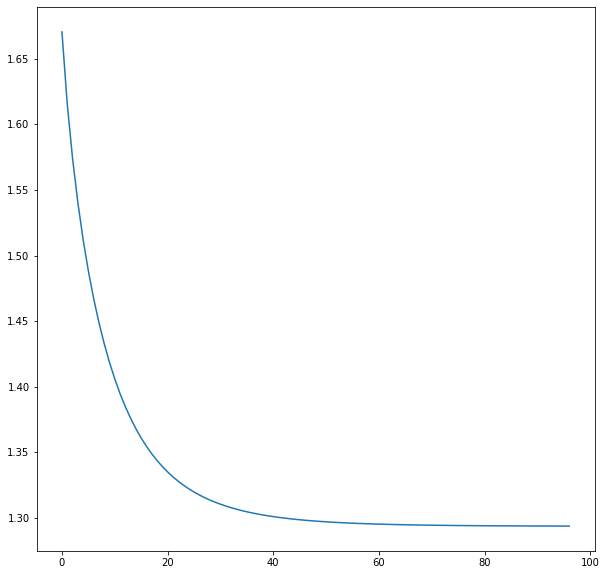

In [300]:
print("Refine ftrs by freezing the rest on the whole dataset")
mf_model.freeze_all()
mf_model.unfreeze_layer("pathway_effect")

errors_list = []
#for n_iter in tqdm(range(100)):
counter = 0
while True:
    epoch_error = 0
    for i_batch, batch in enumerate(ftrs_dataloader):
        dcr, ftrs = batch
        drg = dcr[:,0].long()
        cl = dcr[:,1].long()
        pred_ftrs = mf_model(drg, cl)
        error = loss_function(pred_ftrs, ftrs, 
                      mf_model.cl_embedding(cl), mf_model.drug_embedding(drg), 
                      mf_model.ftr_ptw.weight.data)
        error.backward()
        epoch_error += error.item()
    errors_list.append(epoch_error/(i_batch+1))
    counter +=1
    print("\rIteration {}, Error: {}".format(counter, errors_list[-1]), end="")
    optimizer.step()
    optimizer.zero_grad()
    if len(errors_list)>2:
        if np.abs(errors_list[-1]-errors_list[-2])<0.00001:
            break
    if counter > 5000: break
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(range(len(errors_list)), errors_list)
plt.show()
    

In [303]:
for param_group in optimizer.param_groups:
        param_group['lr'] = 0.01
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [305]:
print("lower learning rate and train all")
mf_model.unfreeze_all()

errors_list = []
#for n_iter in tqdm(range(100)):
counter = 0
while True:
    epoch_error = 0
    for i_batch, batch in enumerate(ftrs_dataloader):
        dcr, ftrs = batch
        drg = dcr[:,0].long()
        cl = dcr[:,1].long()
        pred_ftrs = mf_model(drg, cl)
        error = loss_function(pred_ftrs, ftrs, 
                      mf_model.cl_embedding(cl), mf_model.drug_embedding(drg), 
                      mf_model.ftr_ptw.weight.data)
        error.backward()
        epoch_error += error.item()
    errors_list.append(epoch_error/(i_batch+1))
    counter +=1
    print("\rIteration {}, Error: {}".format(counter, errors_list[-1]), end="")
    optimizer.step()
    optimizer.zero_grad()
    if len(errors_list)>2:
        if np.abs(errors_list[-1]-errors_list[-2])<0.00001:
            break
    if counter > 1000: break
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(range(len(errors_list)), errors_list)
plt.show()
    

lower learning rate and train all


KeyboardInterrupt: 

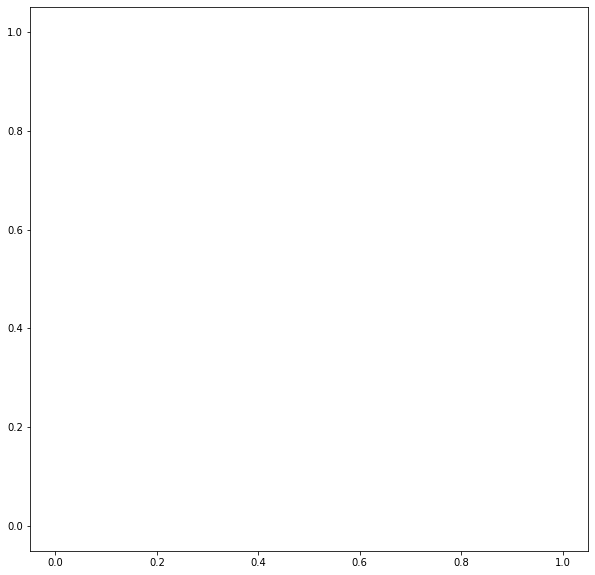

In [306]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(range(len(errors_list)), errors_list)
plt.show()
    

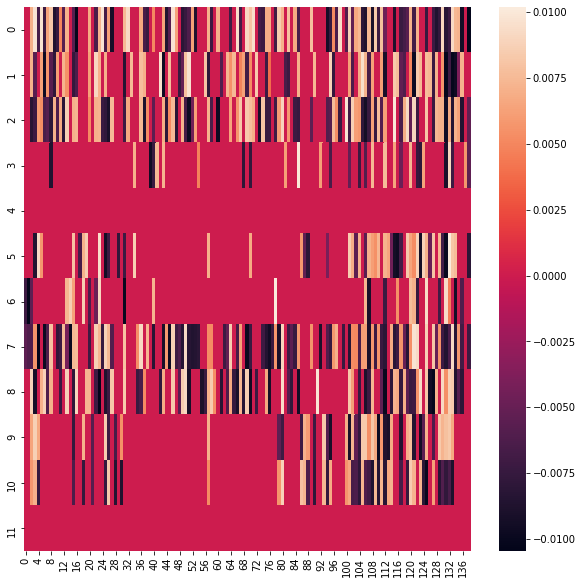

In [307]:
cl_emb = mf_model.cl_embedding.weight.data.numpy()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cl_emb, ax=ax)
plt.show()

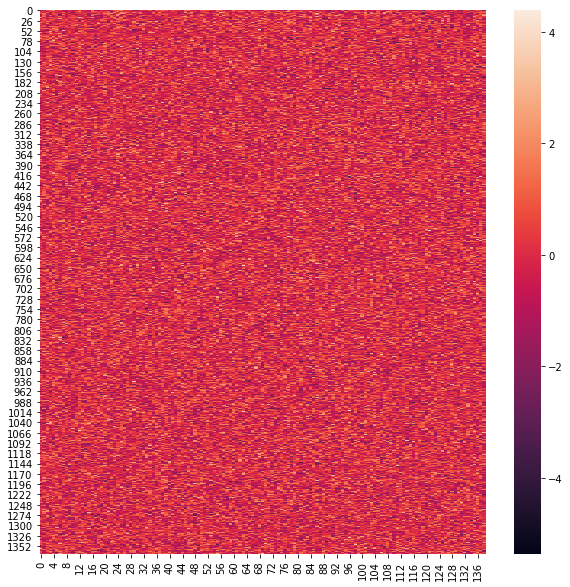

In [308]:
drug_emb = mf_model.drug_embedding.weight.data.numpy()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(drug_emb, ax=ax)
plt.show()

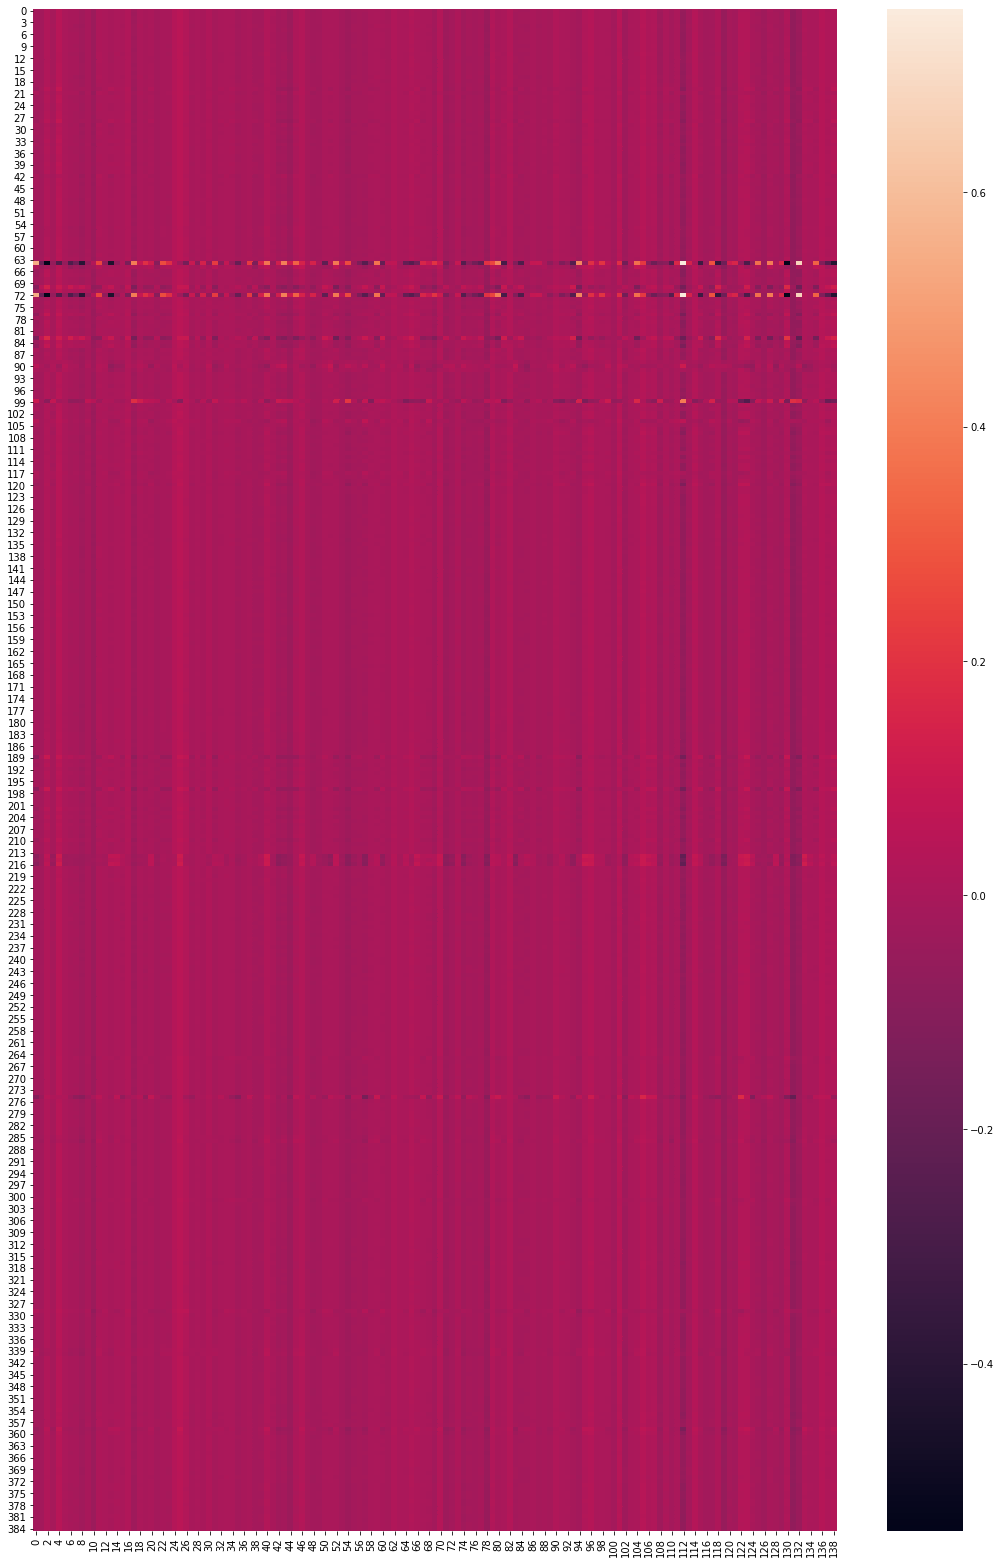

In [309]:
ftr_pat = mf_model.ftr_ptw.weight.data.numpy()
fig, ax = plt.subplots(figsize=(18,28))
sns.heatmap(ftr_pat, ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(ftr_pat.flatten(), bins=30)
plt.show()